In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
years = range(1880, 2020)

In [3]:
pieces = []

In [4]:
columns = ['name', 'sex', 'births']

In [5]:
for year in years:
    path = 'dataset/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
    
    

In [6]:
# Collect all data into one DataFrame object
names = pd.concat(pieces, ignore_index = True)


In [7]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989587,Zyheem,M,5,2019
1989588,Zykel,M,5,2019
1989589,Zyking,M,5,2019
1989590,Zyn,M,5,2019


In [8]:
total_births = names.pivot_table('births', index='year', columns = 'sex', aggfunc = sum)

In [9]:
total_births.tail()

sex,F,M
year,,
2015,1782079,1913452
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309
2019,1670419,1785527


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year', ylabel='quantity'>

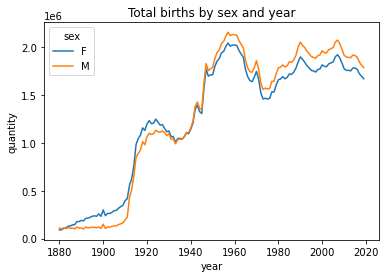

In [10]:
total_births.plot(title = 'Total births by sex and year', ylabel = 'quantity')

In [11]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group


In [12]:
names = names.groupby(['sex', 'year']).apply(add_prop)

In [13]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989587,Zyheem,M,5,2019,0.000003
1989588,Zykel,M,5,2019,0.000003
1989589,Zyking,M,5,2019,0.000003
1989590,Zyn,M,5,2019,0.000003


In [14]:
names.groupby(['sex', 'year']).prop.sum()

sex  year
F    1880    1.0
     1881    1.0
     1882    1.0
     1883    1.0
     1884    1.0
            ... 
M    2015    1.0
     2016    1.0
     2017    1.0
     2018    1.0
     2019    1.0
Name: prop, Length: 280, dtype: float64

In [15]:
# extracting a subset of data to simplify subsequent analysis
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
# asceding = True - сортировка по убыванию
top1000 = names.groupby(['sex', 'year']).apply(get_top1000)


In [16]:
top1000

name sex  births  year      prop
sex year                                               
F   1880 0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
M   2019 1976505     Yadiel   M     210  2019  0.000118
         1976509      Seven   M     209  2019  0.000117
         1976510      Stone   M     209  2019  0.000117
         1976506      Aayan   M     209  2019  0.000117
         1976508       Rome   M     209  2019  0.000117

[279876 rows x 5 columns]

In [17]:
# Deleting the group index, it is no longer needed
top1000.reset_index(inplace = True, drop = True)

In [18]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
279871,Yadiel,M,210,2019,0.000118
279872,Seven,M,209,2019,0.000117
279873,Stone,M,209,2019,0.000117
279874,Aayan,M,209,2019,0.000117


## Анализ тенденций в выборе имен

In [19]:
boys = top1000[top1000.sex == 'M']

In [20]:
girls = top1000[top1000.sex == 'F']

In [21]:
# breaking the top1000-set into parts related to boys and girls

In [22]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

In [23]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Columns: 7216 entries, Aaden to Zyon
dtypes: float64(7216)
memory usage: 7.7 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

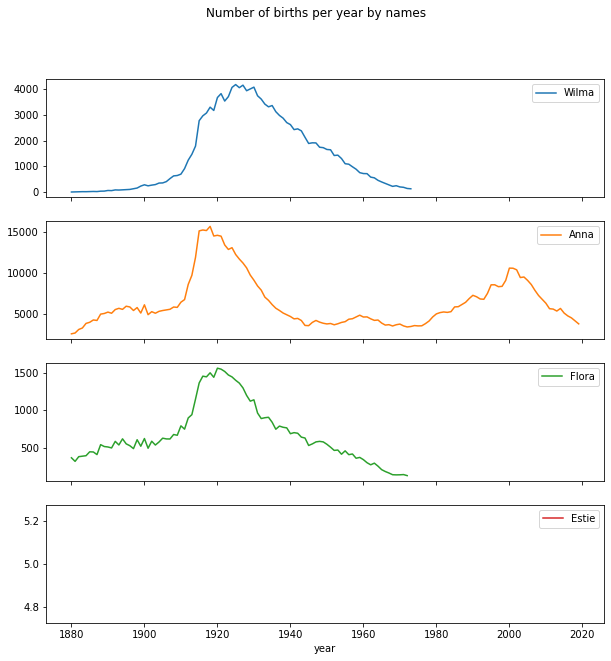

In [24]:
subset = total_births[['Wilma', 'Anna', 'Flora', 'Estie']]
subset.plot(subplots=True, figsize=(10, 10), grid=False, title="Number of births per year by names")

## Измерение роста разнообразия имен

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

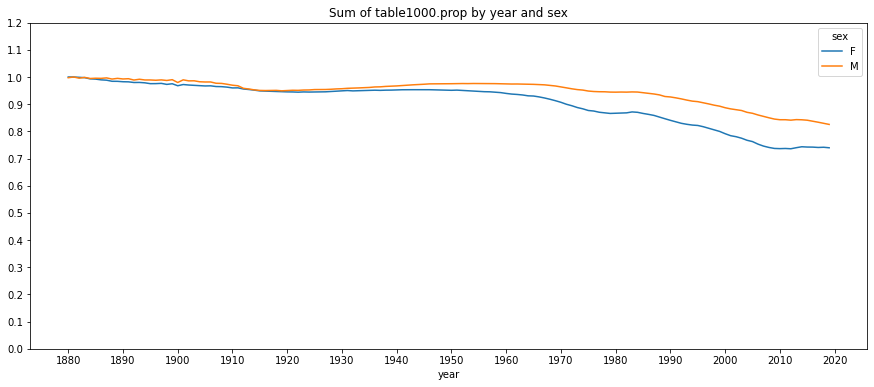

In [25]:
table = top1000.pivot_table('prop', index ='year', columns = 'sex', aggfunc = sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2030, 10), figsize=(15, 6))

In [26]:
boys2019 = boys[boys.year == 2019]

In [27]:
boys2019

,name,sex,births,year,prop
278876,Liam,M,20555,2019,0.011512
278877,Noah,M,19097,2019,0.010695
278878,Oliver,M,13929,2019,0.007801
278879,William,M,13599,2019,0.007616
278880,Elijah,M,13339,2019,0.007471
...,...,...,...,...,...
279871,Yadiel,M,210,2019,0.000118
279872,Seven,M,209,2019,0.000117
279873,Stone,M,209,2019,0.000117
279874,Aayan,M,209,2019,0.000117


In [28]:
prop_cumsum = boys2019.sort_values(by = 'prop', ascending = False).prop.cumsum()

In [29]:
prop_cumsum[:10]

278876    0.011512
278877    0.022207
278878    0.030009
278879    0.037625
278880    0.045095
278881    0.052450
278882    0.059719
278883    0.066689
278884    0.073094
278885    0.079403
Name: prop, dtype: float64

In [30]:
prop_cumsum.values.searchsorted(0.5)

154

In [31]:
boys1990 = boys[boys.year == 1990]


In [32]:
in1990 = boys1990.sort_values(by = 'prop', ascending = False).prop.cumsum()

In [33]:
in1990.values.searchsorted(0.5) + 1

45

In [34]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().values.searchsorted(q) + 1
    

In [35]:
diversity = top1000.groupby(['sex', 'year']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [36]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

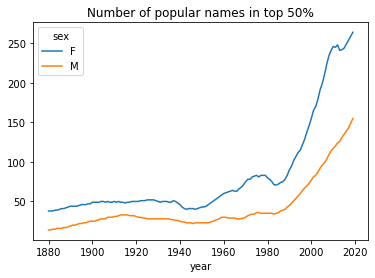

In [37]:
diversity.plot(title = 'Number of popular names in top 50%')

## "Последняя буква"

In [38]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter' # Присваивание названия столбцу


In [39]:
table = names.pivot_table('births', index = last_letters, columns = ['sex','year'], aggfunc = sum)

In [40]:
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2010      2011      2012   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   28882.0   27470.0   27223.0   
b                NaN      NaN      NaN  ...   39294.0   36690.0   34739.0   
c                NaN      NaN      NaN  ...   23357.0   23137.0   24288.0   
d             1027.0   1298.0   1374.0  ...   44851.0   43279.0   42506.0   
e            54353.0  66748.0  66662.0  ...  130307.0  128852.0  128565.0   
f                NaN      NaN      NaN  ...    2312.0    2302.0    2481.0   
g               25.0     44.0     28.0  ...    2697.0    2682.0    3805.0   
h             7141.0   8630.0   8825.0  ...   99352.0   98445.0   99109.0   
i              105.0    141.0    134.0  ...   43463.0   44570.0   47148.0   
j                NaN      NaN      NaN  ...    1480.0    1552.0    1499.0   
k               19.0     21.0     22.0  ...   35529.0   34268.0   34133.0   
l             6174.0   7900.0   8395.0  ...  135078.0  131926.0  129048.0   
m               90.0    123.0    137.0  ...   47365.0   50869.0   55099.0   
n             5512.0   6832.0   7103.0  ...  694804.0  690859.0  682604.0   
o               97.0    134.0    142.0  ...   81600.0   79401.0   78250.0   
p                NaN      NaN      NaN  ...    2432.0    2368.0    2527.0   
q                NaN      NaN      NaN  ...     345.0     357.0     337.0   
r              910.0   1207.0   1214.0  ...  167547.0  166249.0  167630.0   
s             2803.0   3581.0   3569.0  ...  124920.0  121498.0  122052.0   
t             3140.0   3816.0   3784.0  ...

In [41]:
subtable = table.reindex(columns = [1919, 1969, 2019],level = 'year')

In [42]:
subtable.head()

sex                 F                             M                    
year             1919      1969      2019      1919      1969      2019
last_letter                                                            
a            288579.0  611391.0  639800.0    3662.0    5848.0   32440.0
b                 6.0      39.0     555.0    1807.0    1897.0   20662.0
c                 7.0     286.0     960.0    2147.0   28227.0   18568.0
d             20950.0    2894.0    3766.0  133574.0  197930.0   40713.0
e            351104.0  365018.0  296566.0  122735.0  120859.0  118491.0

In [43]:
subtable.sum()

sex  year
F    1919    1130131.0
     1969    1687012.0
     2019    1670419.0
M    1919     980145.0
     1969    1789028.0
     2019    1785527.0
dtype: float64

In [44]:
letter_prop = subtable/subtable.sum()

In [45]:
letter_prop

sex                 F                             M                    
year             1919      1969      2019      1919      1969      2019
last_letter                                                            
a            0.255350  0.362411  0.383018  0.003736  0.003269  0.018168
b            0.000005  0.000023  0.000332  0.001844  0.001060  0.011572
c            0.000006  0.000170  0.000575  0.002190  0.015778  0.010399
d            0.018538  0.001715  0.002255  0.136280  0.110635  0.022802
e            0.310675  0.216370  0.177540  0.125221  0.067556  0.066362
f                 NaN  0.000009  0.000084  0.000528  0.002049  0.001593
g            0.000171  0.000147  0.000459  0.002438  0.007313  0.002791
h            0.052197  0.028923  0.070000  0.046313  0.034268  0.054345
i            0.001901  0.045947  0.043259  0.001137  0.000969  0.030217
j                 NaN       NaN  0.000092       NaN  0.000032  0.000824
k            0.000156  0.000257  0.000319  0.032527  0.043603  0.020214
l            0.035171  0.030215  0.022411  0.067175  0.107571  0.065060
m            0.001729  0.004114  0.003871  0.052406  0.026587  0.032965
n            0.093948  0.107263  0.115513  0.150847  0.186910  0.323790
o            0.002909  0.002065  0.001998  0.018823  0.018406  0.057442
p            0.000011  0.000022  0.000067  0.003457  0.004473  0.001371
q                 NaN       NaN  0.000043       NaN  0.000004  0.000193
r            0.014960  0.029390  0.032803  0.064747  0.042365  0.094241
s            0.049123  0.006801  0.011954  0.123831  0.094466  0.076468
t            0.031936  0.008398  0.014806  0.083949  0.069620  0.032537
u            0.000547  0.000204  0.000604  0.000335  0.000107  0.002918
v                 NaN  0.000007  0.000293  0.000105  0.000057  0.001645
w            0.000044  0.000090  0.004121  0.007277  0.016855  0.010534
x            0.000021  0.000020  0.001890  0.003964  0.001529  0.011537
y            0.128583  0.154864  0.111062  0.070610  0.144288  0.048061
z            0.002019  0.000576  0.000632  0.000262  0.000231  0.001950

<AxesSubplot:title={'center':'Female'}, xlabel='last_letter'>

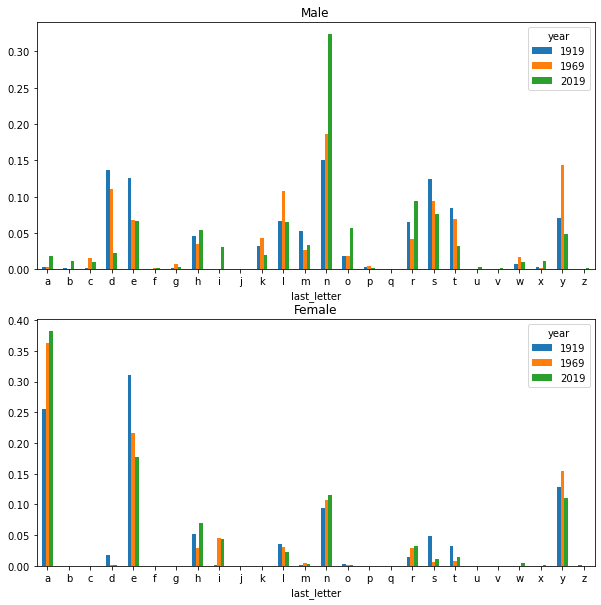

In [49]:
fig, axis = plt.subplots(2, 1, figsize =(10,10))
letter_prop['M'].plot(kind='bar', rot=0, ax=axis[0], title='Male')
letter_prop['F'].plot(kind ='bar', rot =0,ax=axis[1], title='Female')